# Fitting a gauassian distribution using tensorflow

This lab showcases that tensorflow distributions can be paramatrized by variables. In particular, we will learn the mean and variance of a gaussian distribution based on data.

*Special thanks to Mihaela Rosca for providing much of the underlying structure and code of this colab.*

In [1]:
#@title Setup and imports.
!pip install dm-sonnet

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import tensorflow as tf
from tensorflow import distributions as tfd
import random
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')



In [0]:
tf.reset_default_graph()

## Setting up the Target Distribution

We start by defining a distribution which we will try to match based on samples.

In [3]:
data_dist = tfd.Normal(loc=-1., scale=0.1)
data_dist

<tf.distributions.Normal 'Normal/' batch_shape=() event_shape=() dtype=float32>

Let's visualize the pdf of this distribution.

In [0]:
# Points to evaluate the pdf on.
x_plot = tf.linspace(-2., 3., int(1e4))
# The pdf evaluated at these points.
data_dist_pdf = data_dist.prob(x_plot)

So far we've been working with tensors. In order to plot the pdf, we get the values of the tensors by running them.

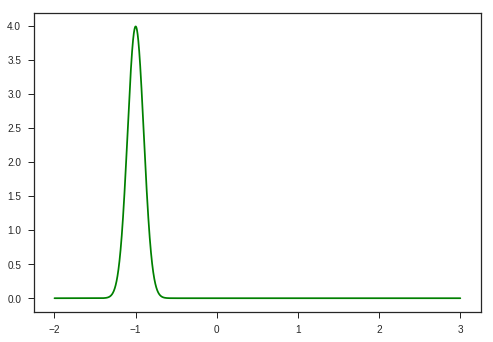

In [5]:
with tf.Session() as sess:  
  x_vals, data_pdf_vals = sess.run([x_plot, data_dist_pdf])
plt.plot(x_vals, data_pdf_vals, 'g')
plt.show()

Great. Let's take 1000 ssamples from this distribution: this will constitute the data we learn from.

In [6]:
target_data = data_dist.sample(1000)
target_data

<tf.Tensor 'Normal/sample/Reshape:0' shape=(1000,) dtype=float32>

## Setting up the parametrized, learnable distribution

We start with a model that is initialized to be Gaussian with 0 mean and standard deviation of 1.

In [0]:
mean = tf.Variable(tf.zeros(shape=(), dtype=tf.float32), name="mean")
std = tf.Variable(tf.ones(shape=(), dtype=tf.float32), name="std")
model = tfd.Normal(mean, std)

We can compare the pdfs for the model and the target distributions.

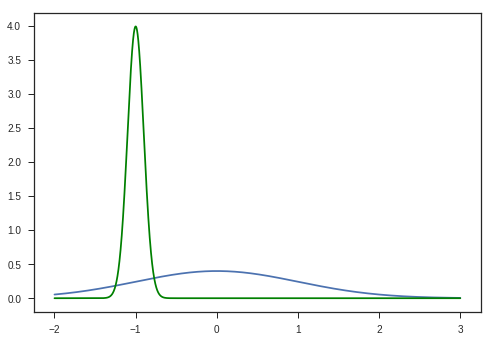

In [8]:
model_pdf = model.prob(x_plot)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init_op)
  model_pdf_vals = sess.run(model_pdf)
  
plt.plot(x_vals, model_pdf_vals)
plt.plot(x_vals, data_pdf_vals, 'g')
plt.show()

We can see these look very different.

## Training

We train the model to match the target distribution by minimizing the negative log probabilty of the observed data under the model. (This is similar to maximizing the probability of the data under the model.)

In [0]:
optim = tf.train.AdamOptimizer(1e-3)
train_op = optim.minimize(-tf.reduce_mean(model.log_prob(target_data)))
init_op = tf.global_variables_initializer()


While we train, we periodically visualize how the model changes.

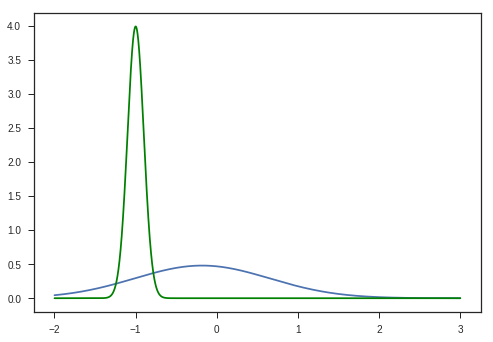

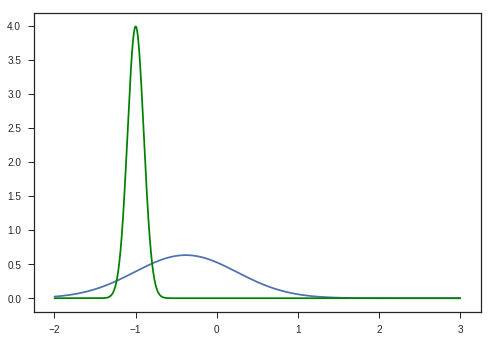

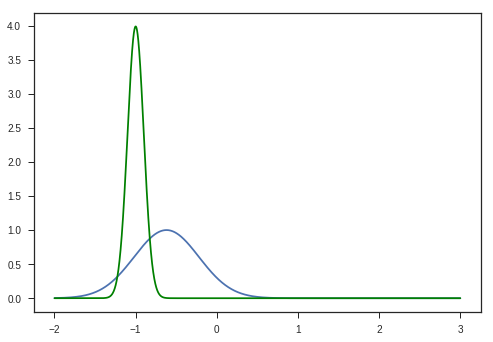

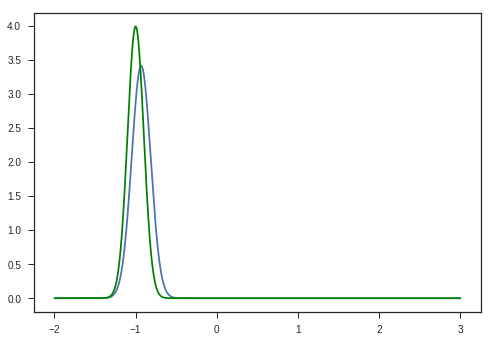

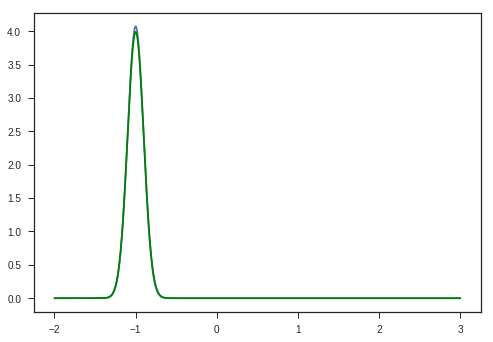

In [10]:
with tf.Session() as sess:
  sess.run(init_op)
  for _ in range(5):
    for _ in xrange(175):
      sess.run(train_op)

    model_pdf_vals = sess.run(model_pdf)

    plt.plot(x_vals, model_pdf_vals)
    plt.plot(x_vals, data_pdf_vals, 'g')
    plt.show()

## Success

We can see that in less than 1000 steps the model learns to nearly perfectly match the target distribution.